In [28]:
import time
import datetime
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error
plt.style.use('fivethirtyeight')

In [29]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [30]:
ticker='DIS'
period1 = int(time.mktime(datetime.datetime(2015, 1, 1, 0, 0).timetuple()))
period2 = int(time.mktime(datetime.datetime.now().timetuple()))
interval = '1d' # 1d, 1m
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
df_dis = pd.read_csv(query_string)

In [31]:
df_dis['symbol']='DIS'
df_dis
#df_dis.to_csv('DIS.csv')

,Date,Open,High,Low,Close,Adj Close,Volume,symbol
0,2015-01-02,94.910004,95.279999,92.849998,93.750000,87.376251,5865400,DIS
1,2015-01-05,93.279999,93.349998,91.779999,92.379997,86.099403,7789400,DIS
2,2015-01-06,92.570000,93.190002,91.160004,91.889999,85.642700,6793100,DIS
3,2015-01-07,92.720001,93.150002,92.099998,92.830002,86.518799,6589500,DIS
4,2015-01-08,93.870003,94.300003,93.559998,93.790001,87.413551,7579400,DIS
...,...,...,...,...,...,...,...,...
1772,2022-01-14,152.350006,152.619995,148.419998,151.940002,151.940002,16821900,DIS
1773,2022-01-18,151.110001,153.130005,149.830002,152.270004,152.270004,10419500,DIS
1774,2022-01-19,150.839996,152.860001,149.960007,150.110001,150.110001,10413200,DIS
1775,2022-01-20,150.910004,152.660004,147.149994,147.619995,147.619995,11760400,DIS


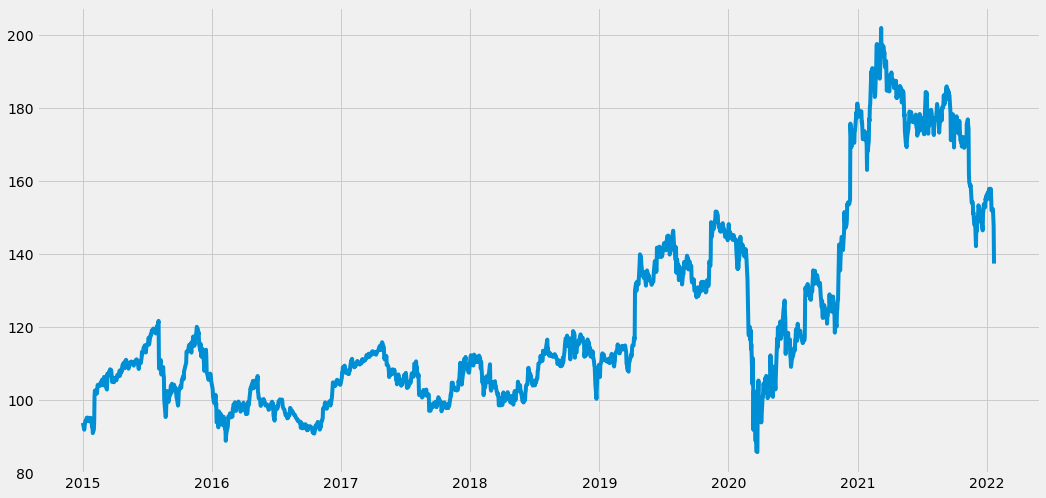

In [32]:
#setting index as date
df_dis['Date'] = pd.to_datetime(df_dis.Date,format='%Y-%m-%d')
df_dis.index = df_dis['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df_dis['Close'], label='Precio de Cierre Historico')

In [33]:
#creating dataframe with date and the target variable
data = df_dis.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df_dis)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [34]:
new_data.head()

,Date,Close
0,2015-01-02 00:00:00,93.75
1,2015-01-05 00:00:00,92.379997
2,2015-01-06 00:00:00,91.889999
3,2015-01-07 00:00:00,92.830002
4,2015-01-08 00:00:00,93.790001


In [35]:
# new_data.iloc[951:955]
new_data.iloc[250:255]
# new_data.loc[new_data.dates=='2015-09-24 00:00:00']

,Date,Close
250,2015-12-30 00:00:00,106.339996
251,2015-12-31 00:00:00,105.080002
252,2016-01-04 00:00:00,102.980003
253,2016-01-05 00:00:00,100.900002
254,2016-01-06 00:00:00,100.360001


In [36]:
#splitting into train and validation
train = new_data[:1551]
valid = new_data[1551:]

In [37]:
new_data.shape, train.shape, valid.shape

((1777, 2), (1551, 2), (226, 2))

In [38]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

(Timestamp('2015-01-02 00:00:00'),
 Timestamp('2021-03-02 00:00:00'),
 Timestamp('2021-03-03 00:00:00'),
 Timestamp('2022-01-21 00:00:00'))

In [43]:
#make predictions
preds = []
for i in range(0,226):
    a = train['Close'][len(train)-226+i:].sum() + sum(preds)
    b = a/226
    preds.append(b)

In [44]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

30.50147530006558

<ipython-input-46-634359586e31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-46-634359586e31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


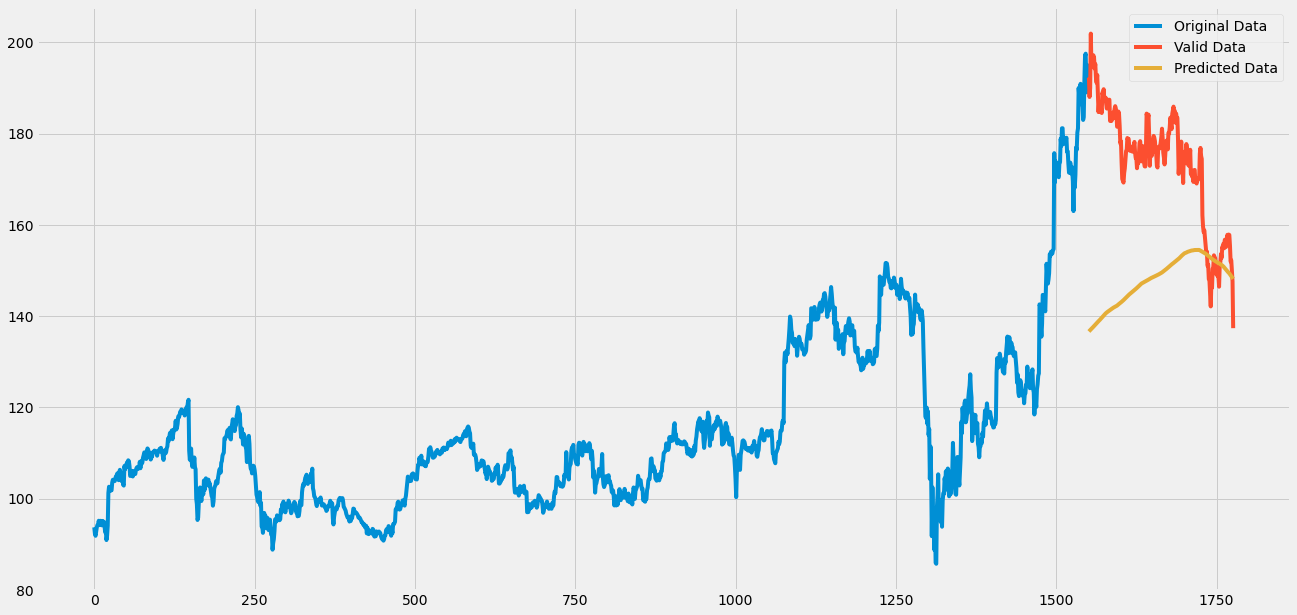

In [46]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original Data','Valid Data', 'Predicted Data'])
plt.show()

### Auto ARIMA

In [26]:
#pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [47]:
from pmdarima.arima import auto_arima

In [49]:
data = df_dis.sort_index(ascending=True, axis=0)

train = data[:1551]
valid = data[1551:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=226)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.00 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=7521.306, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7069.486, Time=0.53 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.40 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=7494.135, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=6857.248, Time=1.47 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=9.12 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.06 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=6890.127, Time=1.27 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=6859.121, Time=3.09 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=6859.146, Time=3.70 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=6858.774, Time=1.66 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=6857.842, Time=8.00 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=6859.239, Time=6.74 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]  

In [50]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

97.07680667129532

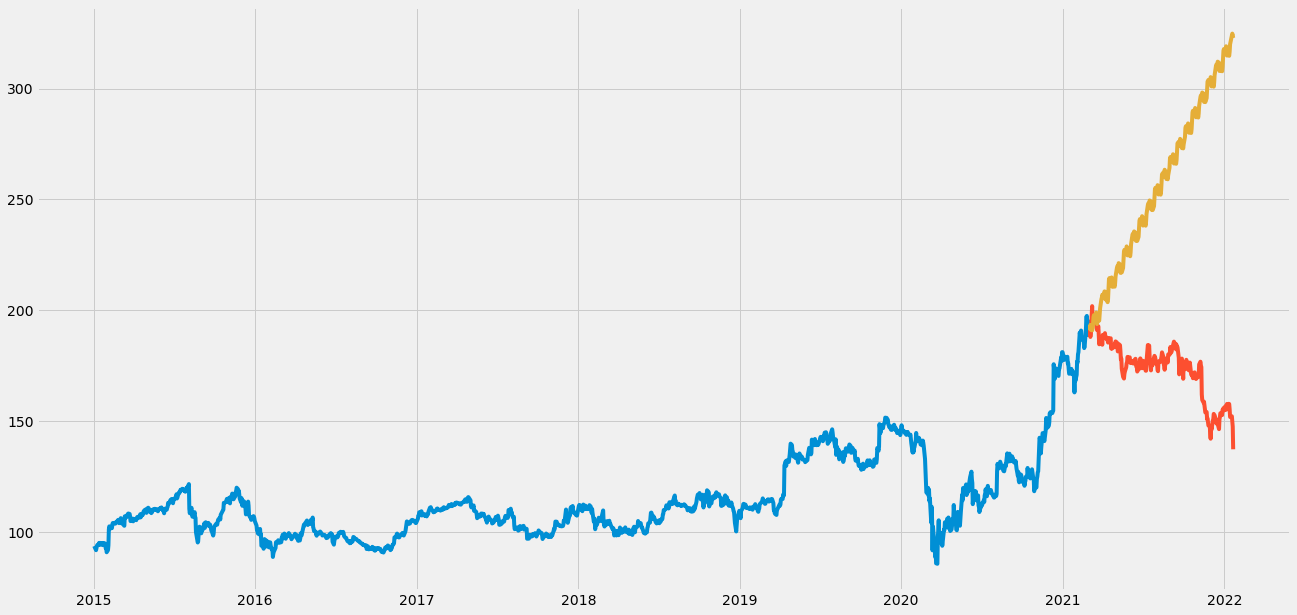

In [51]:
#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

### Long Short Term Memory (LSTM)

In [53]:
#creating dataframe
data = df_dis.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df_dis)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:1551,:]
valid = dataset[1551:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [54]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

1491/1491 - 45s - loss: 0.0019 - 45s/epoch - 30ms/step


In [55]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

7.522197137431574

<ipython-input-57-2a88a0634cfb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


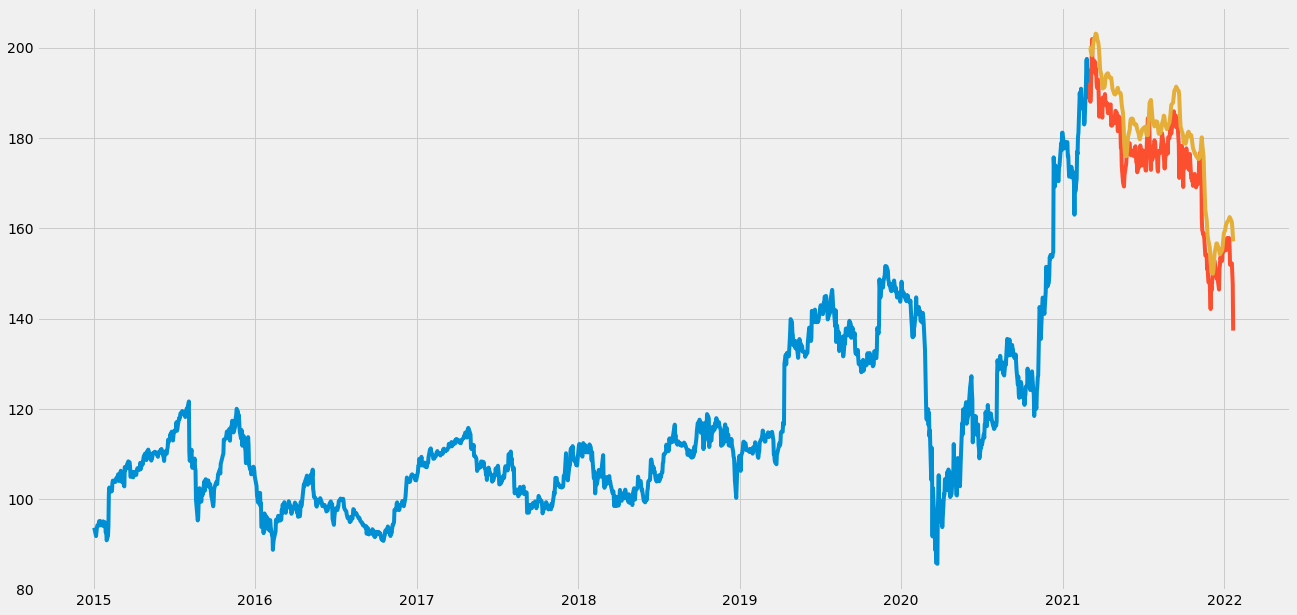

In [57]:
#for plotting
train = new_data[:1551]
valid = new_data[1551:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

### Decision Tree Regression and Linear Regression

In [59]:
ticker='DIS'
period1 = int(time.mktime(datetime.datetime(2015, 1, 1, 0, 0).timetuple()))
period2 = int(time.mktime(datetime.datetime.now().timetuple()))
interval = '1d' # 1d, 1m
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
df = pd.read_csv(query_string)

In [60]:
df['symbol']='DIS'
df.index=pd.to_datetime(df['Date'])
df=df.drop(['Date'],axis='columns')
df
#df.to_csv('DIS.csv')

,Open,High,Low,Close,Adj Close,Volume,symbol
Date,,,,,,,
2015-01-02,94.910004,95.279999,92.849998,93.750000,87.376259,5865400,DIS
2015-01-05,93.279999,93.349998,91.779999,92.379997,86.099403,7789400,DIS
2015-01-06,92.570000,93.190002,91.160004,91.889999,85.642708,6793100,DIS
2015-01-07,92.720001,93.150002,92.099998,92.830002,86.518814,6589500,DIS
2015-01-08,93.870003,94.300003,93.559998,93.790001,87.413536,7579400,DIS
...,...,...,...,...,...,...,...
2022-01-14,152.350006,152.619995,148.419998,151.940002,151.940002,16821900,DIS
2022-01-18,151.110001,153.130005,149.830002,152.270004,152.270004,10419500,DIS
2022-01-19,150.839996,152.860001,149.960007,150.110001,150.110001,10413200,DIS


In [61]:
df=df[['Close']]
df

,Close
Date,
2015-01-02,93.750000
2015-01-05,92.379997
2015-01-06,91.889999
2015-01-07,92.830002
2015-01-08,93.790001
...,...
2022-01-14,151.940002
2022-01-18,152.270004
2022-01-19,150.110001


In [62]:
#Create a variable to predict 'x' days out the future
future_days=100
#Create a new column (target) shifted 'x' units/dayys up
df['Prediction']=df[['Close']].shift(-future_days)
df.tail(4)

<ipython-input-62-d8e26e26d5bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction']=df[['Close']].shift(-future_days)


,Close,Prediction
Date,,
2022-01-18,152.270004,NaN
2022-01-19,150.110001,NaN
2022-01-20,147.619995,NaN
2022-01-21,137.380005,NaN


In [63]:
# Create the feature data set (x) and convert it to a numpy_array and remove the last 'x' rows/days
X= np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[ 93.75    ]
 [ 92.379997]
 [ 91.889999]
 ...
 [176.559998]
 [180.139999]
 [179.979996]]


In [64]:
#Create the target data ser (y) it to a numpy array and get all of the taret values except the rows
y = np.array(df['Prediction'])[:-future_days]
print(y)

[110.529999 110.370003 110.959999 ... 150.110001 147.619995 137.380005]


In [65]:
#Split the data into 75% training and 25% testing 
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [66]:
#Create the models
#Create the decision tree regressor model 
tree = DecisionTreeRegressor().fit(x_train,y_train)

#Create the linear regression model
lr = LinearRegression().fit(x_train,y_train)

In [67]:
#Get the last 'x' rows of the futured data set
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[187.889999],
       [186.490005],
       [185.490005],
       [187.460007],
       [185.929993],
       [187.259995],
       [187.429993],
       [182.789993],
       [183.110001],
       [182.759995],
       [183.020004],
       [184.270004],
       [184.639999],
       [183.389999],
       [185.330002],
       [186.020004],
       [185.509995],
       [184.25    ],
       [181.509995],
       [181.789993],
       [184.839996],
       [184.300003],
       [181.669998],
       [177.850006],
       [178.339996],
       [173.699997],
       [170.080002],
       [169.679993],
       [169.270004],
       [171.360001],
       [172.399994],
       [174.309998],
       [176.169998],
       [176.470001],
       [179.039993],
       [178.649994],
       [178.839996],
       [177.      ],
       [176.240005],
       [177.179993],
       [176.990005],
       [176.330002],
       [176.039993],
       [176.570007],
       [177.380005],
       [178.179993],
       [175.860001],
       [174.6

In [68]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
# Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[181.300003  183.479996  176.25      185.910004  184.339996  185.149994
 185.910004  182.399994  184.979996  182.399994  184.410004  183.339996
 179.089996  146.220001  171.169998  184.339996  176.25      183.339996
 178.259995  174.520004  173.25      169.169998  174.520004  173.460007
 174.610001  175.479996  177.710007  172.419998  173.520004  173.130005
 172.960007  174.410004  176.460007  171.139999  167.0399935 170.550003
 171.339996  178.350006  172.009995  154.869995  178.350006  172.009995
 169.070007  170.190002  169.830002  170.080002  170.279999  176.869995
 176.869995  175.110001  174.449997  162.110001  159.630005  158.429993
 146.470001  170.190002  181.669998  154.        154.160004  151.029999
 151.339996  148.110001  147.809998  144.899994  142.149994  147.199997
 146.220001  150.369995  150.809998  153.339996  155.929993  152.710007
 150.429993  149.100006  150.399994  148.75      148.759995  146.470001
 151.050003  151.880005  153.630005  152.800003  155.199997  154

In [71]:
rms=np.sqrt(np.mean(np.power((x_future-tree_prediction),2)))
rms

19.447231087947007

<ipython-input-69-25d4e7f4563d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


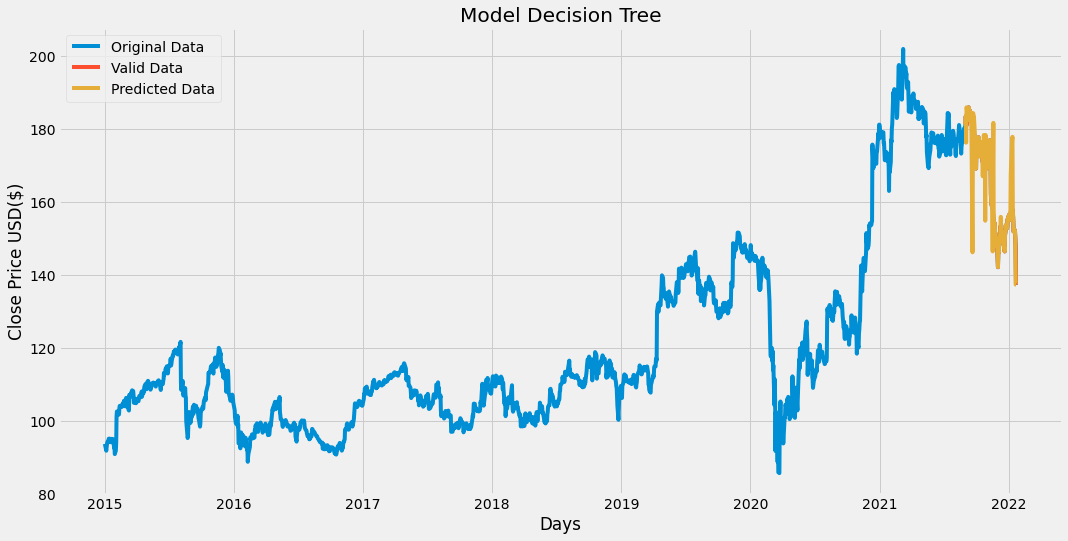

In [69]:
# Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model Decision Tree')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original Data','Valid Data', 'Predicted Data'])
plt.show()

In [72]:
rms=np.sqrt(np.mean(np.power((x_future-lr_prediction),2)))
rms

11.245602926419377

<ipython-input-70-882e746d2c84>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


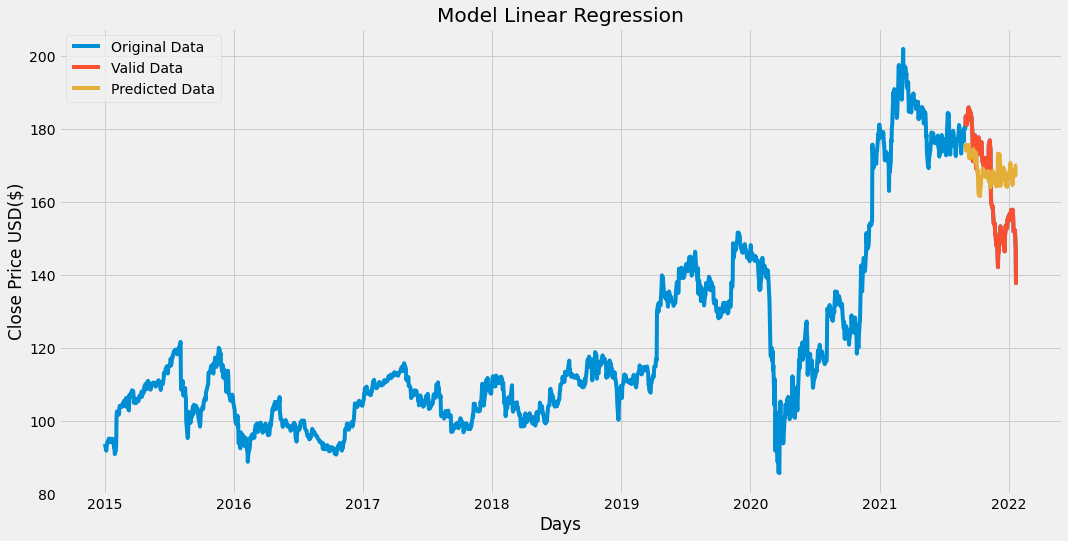

In [70]:
# Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model Linear Regression')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original Data','Valid Data', 'Predicted Data'])
plt.show()